In [1]:
import requests
import time
import matplotlib.pyplot as plt

# NY Times

In [38]:
# NY TIMES API 
api_key = 'gkHhhsov9LrY3D0rs7UybUHaytbIAmve'

In [39]:
# Getting all relevant articles for last 5 years
all_articles = []
stats_dict = {}
article_filter = ['News', 'Op-Ed', 'News Analysis', 'Editorial']
year_totals = []

for year in range(2015,2020):
    print("Year:",year,end='')
    count_total = 0
    count_relevant = 0
    # Initializing the stats_dict structure
    stats_dict[year] = {}
    for type_ in article_filter:
        stats_dict[year][type_]= 0

    for month in range(1,13):
        print(".",end='')
        time.sleep(6) # Adding time delay to not hit API calls per minute limit
        url = 'https://api.nytimes.com/svc/archive/v1/'+str(year)+'/'+str(month)+'.json?&api-key='+api_key
        response = requests.get(url)
        if response.status_code !=200:
            print("API Error!\n")
            break
        articles = response.json()['response']['docs']
        # Filtering articles which have 'type_of_material' key
        articles = [a for a in articles if 'type_of_material' in a]
        relevant_articles = [a for a in articles if a['type_of_material'] in article_filter]
        count_total+=len(articles)
        count_relevant+=len(relevant_articles)
        # Populating stats for each article category per year
        for type_ in article_filter:
            stats_dict[year][type_] += len([a for a in relevant_articles if a['type_of_material']==type_])

    year_totals.append(count_relevant)        
    print("% Relevant articles in year "+str(year)+": ", (count_relevant/count_total)*100)

Year: 2015............% Relevant articles in year 2015:  48.69779268008549
Year: 2016............% Relevant articles in year 2016:  61.450386691001725
Year: 2017............% Relevant articles in year 2017:  75.94328584210889
Year: 2018............% Relevant articles in year 2018:  78.06178853886992
Year: 2019............% Relevant articles in year 2019:  78.77627425551178


In [40]:
stats_dict

{2015: {'News': 43669, 'Op-Ed': 3111, 'News Analysis': 12, 'Editorial': 1281},
 2016: {'News': 42282, 'Op-Ed': 3232, 'News Analysis': 77, 'Editorial': 1209},
 2017: {'News': 49151, 'Op-Ed': 4613, 'News Analysis': 221, 'Editorial': 1184},
 2018: {'News': 56521, 'Op-Ed': 6499, 'News Analysis': 309, 'Editorial': 926},
 2019: {'News': 56990, 'Op-Ed': 6278, 'News Analysis': 335, 'Editorial': 784}}

In [44]:
for year in stats_dict:
    count = 0
    for types in stats_dict[year].keys():
        count+=stats_dict[year][types]
    print("% News type articles in year "+str(year)+':',(stats_dict[year]['News']/count)*100)

% News type articles in year 2015: 90.83893245688847
% News type articles in year 2016: 90.34615384615384
% News type articles in year 2017: 89.09170004894052
% News type articles in year 2018: 87.96358260057583
% News type articles in year 2019: 88.5116560796434


### -> Conclusion: Since majority are of the type 'News', it is safe just to consider these type of articles 

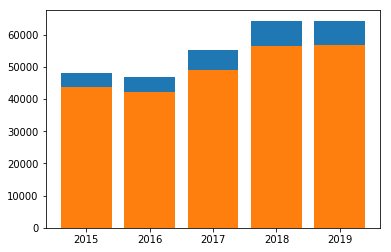

In [50]:
# Yearwise relevant articles(blue) and type 'News' articles(orange)
type_news = [stats_dict[year]['News'] for year in stats_dict]
plt.bar(list(stats_dict.keys()), year_totals)
plt.bar(list(stats_dict.keys()), type_news)
plt.show()

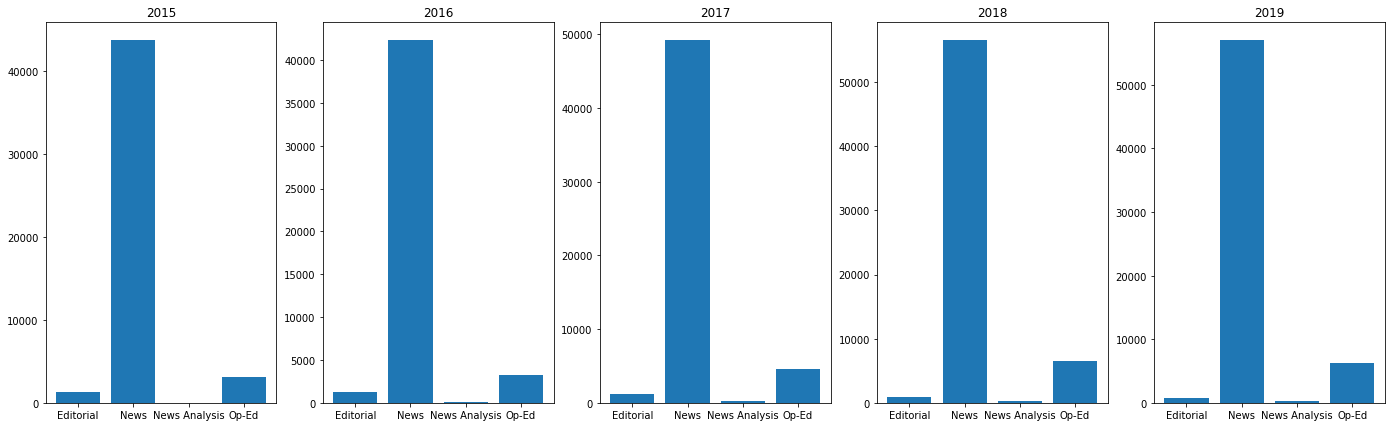

In [45]:
# Plotting stats_dict yearwise
fig,ax = plt.subplots(1,5,figsize=(24,7))
for i,year in enumerate(stats_dict.keys()):
    lists = sorted(stats_dict[year].items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    ax[i].bar(x, y)
    ax[i].set_title(str(year))
plt.show()

# Guardian

In [2]:
# Guardian API Key
g_api_key = 'bcf0c5ca-6041-4073-9247-cdd4242543b7'

In [36]:
# Inspecting possible article types
article_types = []

In [37]:
url = 'http://content.guardianapis.com/search'
# Date Format - 2014-02-17
params = {'from-date': 0,
        'to-date': '2019-01-31',
        'show-fields': 'all',
        'page':1,
        'page-size': 50,
        'api-key': g_api_key}

for year in range(2015,2020):
    print("Year",year,end='')
    params['from-date'] = str(year)+'-01-01'
    params['to-date'] = str(year)+'-12-31'
    params['page'] = 1
    # Extra call necessary to get number of pages 
    response = requests.get(url, params)
    if response.status_code !=200:
        print("API Error!\n")
        break
    pages = response.json()['response']['pages']
    current_page = 1
    while current_page <= 10:
        print(".",end='')
        response = requests.get(url, params)
        if response.status_code !=200:
            print("API Error!\n")
            break
        articles = response.json()['response']['results']
        for a in articles:
            if a['type'] not in article_types:
                article_types.append(a['type'])
        current_page+=1
        time.sleep(5) # Adding time delay to not hit API calls per minute limit
    print('')
article_types

Year 2015..........
Year 2016..........
Year 2017..........
Year 2018..........
Year 2019..........


['article', 'interactive', 'liveblog']

In [19]:
articles = response.json()['response']['results']
articles[9]

{'id': 'entertainment-one-on-the-basis-of-sex/2019/feb/01/the-supreme-timing-of-ruth-bader-ginsburgs-biopic-on-the-basis-of-sex',
 'type': 'article',
 'sectionId': 'entertainment-one-on-the-basis-of-sex',
 'sectionName': 'Entertainment One: On the Basis of Sex',
 'webPublicationDate': '2019-01-31T22:23:15Z',
 'webTitle': 'The supreme timing of Ruth Bader Ginsburg’s biopic ‘On the Basis of Sex’',
 'webUrl': 'https://www.theguardian.com/entertainment-one-on-the-basis-of-sex/2019/feb/01/the-supreme-timing-of-ruth-bader-ginsburgs-biopic-on-the-basis-of-sex',
 'apiUrl': 'https://content.guardianapis.com/entertainment-one-on-the-basis-of-sex/2019/feb/01/the-supreme-timing-of-ruth-bader-ginsburgs-biopic-on-the-basis-of-sex',
 'fields': {'headline': 'The supreme timing of Ruth Bader Ginsburg’s biopic ‘On the Basis of Sex’',
  'standfirst': '<p> How this distinguished justice and feminist icon helped dismantle sexism – and why we still need her today. </p>',
  'trailText': ' How this distinguis